# Random Forest for Classification

## Introduction
In this notebook, we will work with one of the most populer data sets in the world. It is [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) which contains petal lenth, petal with, sepal lenght and sepal with of three different classes of Iris species. These classes are named as Setosa, Versicolor and Virginica. We are going to build a machine learning model to determine plant's classes based on their features.

### What is Random Forest ?
Random Forest is an ensemble model which consists of Decision Trees as base estimators. If you would like to remember Decision Trees, you can look at [this notebook](https://github.com/Bhasfe/ml-algorithms/blob/master/Decision%20Tree%20-%20Classification). Base estimators (Decision Trees) are trained on **bootstrap samples** of training set. *n number of features* (default: square root of number of features) are sampled at the nodes *without replecament*. After that, each estimator makes predictions based on a new instance and the final decision is chosen by **majority voting.** <br><br>
Following figure shows us how random forest works.
<br><br>
<img src="img.png" width="600px" height="600px" align="left"/>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
You can find further information [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

## 1. Importing data
Let's start with importing the libraries/packages that we are going to use.

In [12]:
# Fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

Now we can import our data into a DataFrame

In [2]:
data = pd.read_csv('../datasets/iris.data',header=None,names=['sepal_length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)','class'])

## 2. Explore the data
It is always good practice to do exploratory data analysis before building any models

In [3]:
# Display first five rows of the DataFrame
display(data.head())

# Get fundamental information about the DataFrame
display(data.info())

# We can also look at summary statistics
display(data.describe())

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length(cm)  150 non-null    float64
 1   sepal_width(cm)   150 non-null    float64
 2   petal_length(cm)  150 non-null    float64
 3   petal_width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see above, we have 150 observations and no missing values. Let's visualize our data with a scatter plot

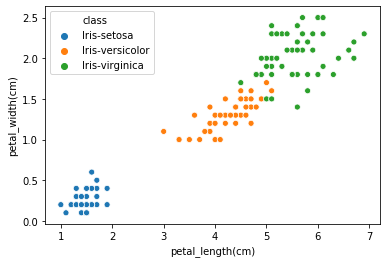

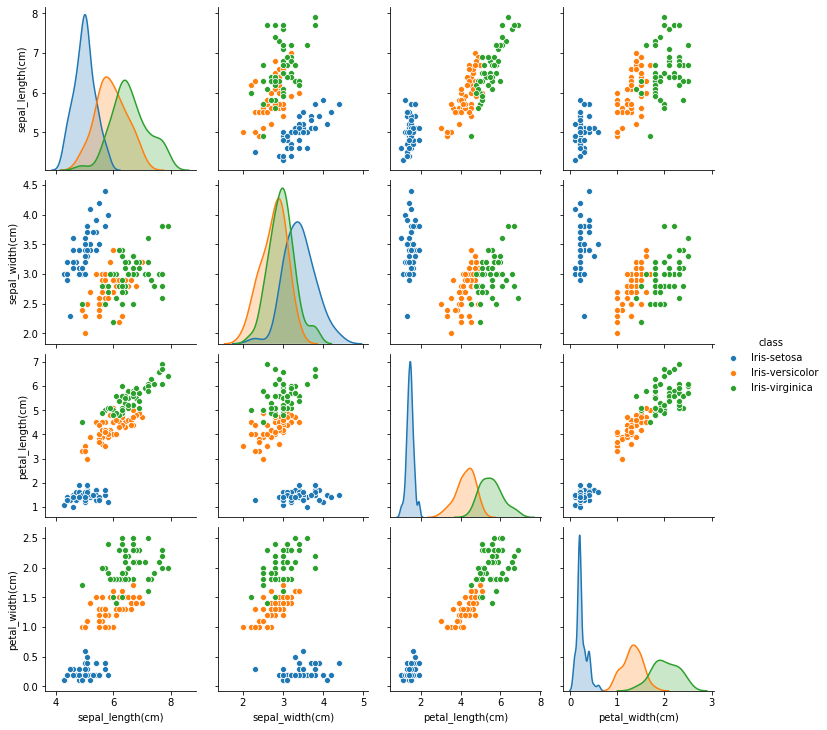

In [4]:
# Plot a scatter plot petal width vs petal length
sns.scatterplot(x='petal_length(cm)',y='petal_width(cm)',hue='class',data=data)
plt.show()
sns.pairplot(data=data,hue='class')
plt.show()

## 3. Build the model

Before we build our model, we have to split our data into training and test sets. To do this we are going to use train_test_split method from sci-kit

In [21]:
# Initialize the Label Encoder
le = LabelEncoder()

# Select the features and the target
features = data.iloc[:,0:4]
target_encoded = le.fit_transform(data['class'].astype('category'))

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(features,target_encoded,test_size=0.3,random_state=34,stratify=target_encoded)

Now we can initialize our model and fit it. We are going to use GridSearchCV for hyperparameter tuning

In [22]:
# Initialize the Random Forest classifier
dt = RandomForestClassifier(n_estimators=80,criterion='entropy',random_state=90)

# Fit the model with training set
dt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=90, verbose=0,
                       warm_start=False)

## 4. Evaluate the model

We've trained our model. Let's make predictions and calculate the accuracy

In [24]:
# Predict from the test set
y_pred = dt.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.9555555555555556

Confusion Matrix

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


That's the end of this notebook. I hope it is helpful for understanding Random Forest